In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats
import acquire
import prepare


# Part 1

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:



1. Acquire, prepare & split your data.



In [2]:
iris = acquire.get_iris_data()
iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [3]:
iris = prepare.prep_iris(iris)


In [4]:
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [5]:
train_iris, validate_iris, test_iris = prepare.train_val_test(iris, 'species')

In [6]:
print(f'Train: {train_iris.shape}')
print(f'Validaate: {validate_iris.shape}')
print(f'Test:{test_iris.shape}')

Train: (105, 5)
Validaate: (22, 5)
Test:(23, 5)


In [7]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
98,versicolor,5.1,2.5,3.0,1.1
68,versicolor,6.2,2.2,4.5,1.5
19,setosa,5.1,3.8,1.5,0.3
143,virginica,6.8,3.2,5.9,2.3
99,versicolor,5.7,2.8,4.1,1.3


In [8]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       105 non-null    object 
 1   sepal_length  105 non-null    float64
 2   sepal_width   105 non-null    float64
 3   petal_length  105 non-null    float64
 4   petal_width   105 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


2. Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



In [9]:
train_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,105.0,5.873333,0.862941,4.3,5.1,5.8,6.4,7.9
sepal_width,105.0,3.055238,0.457203,2.0,2.8,3.0,3.3,4.4
petal_length,105.0,3.784762,1.784052,1.1,1.6,4.2,5.1,6.9
petal_width,105.0,1.205714,0.777549,0.1,0.3,1.3,1.9,2.5


In [10]:
# plot numeric values
num_col = train_iris.columns[[train_iris[col].dtypes == 'float64' for col in train_iris.columns]]


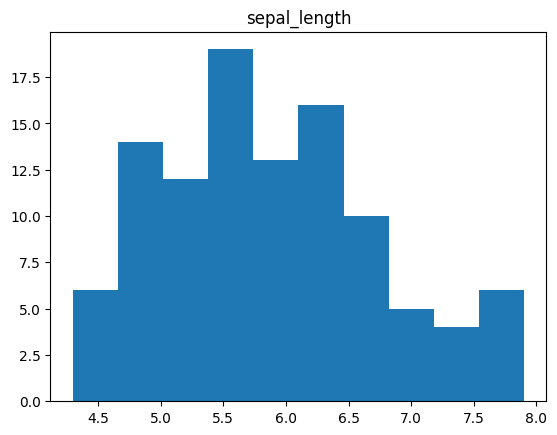

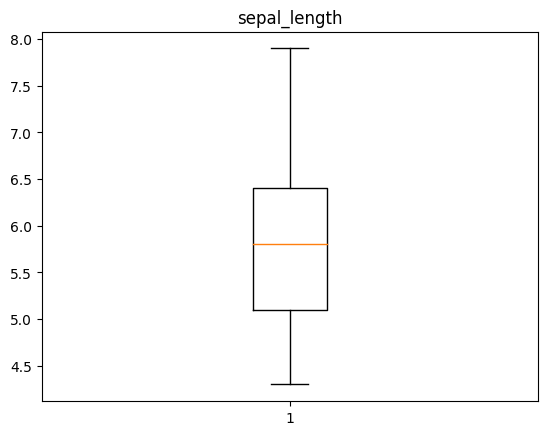

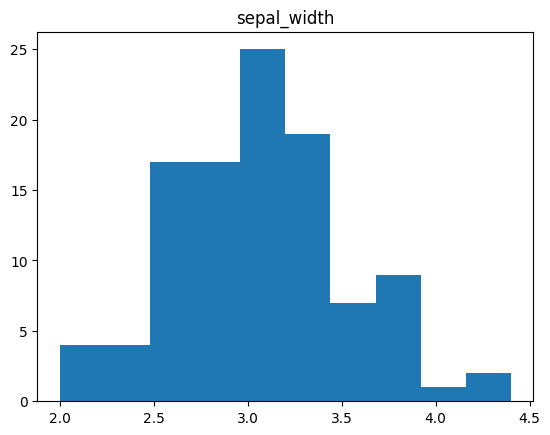

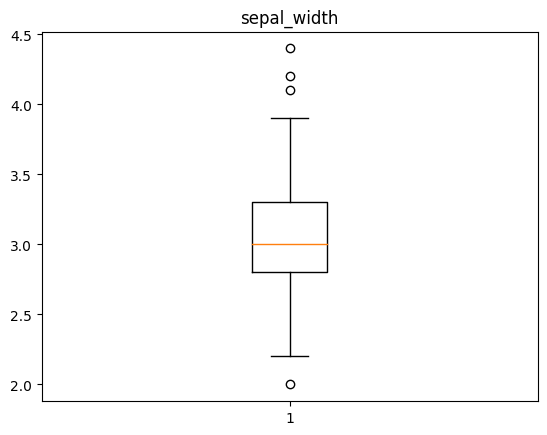

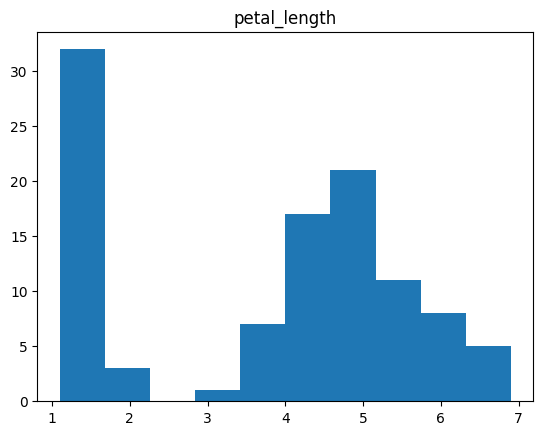

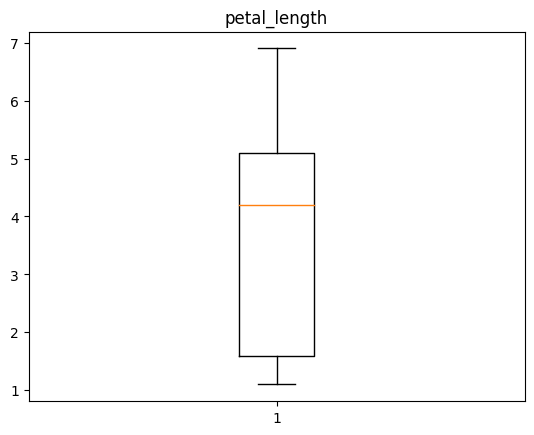

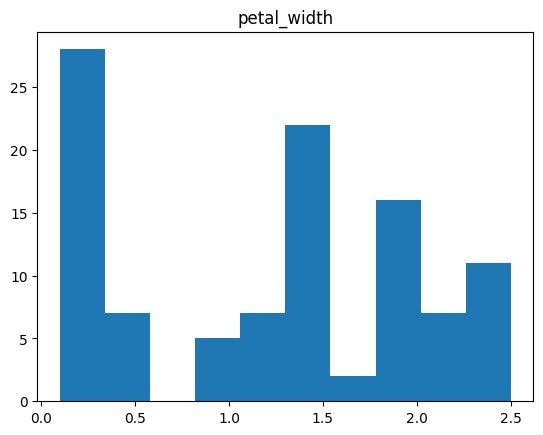

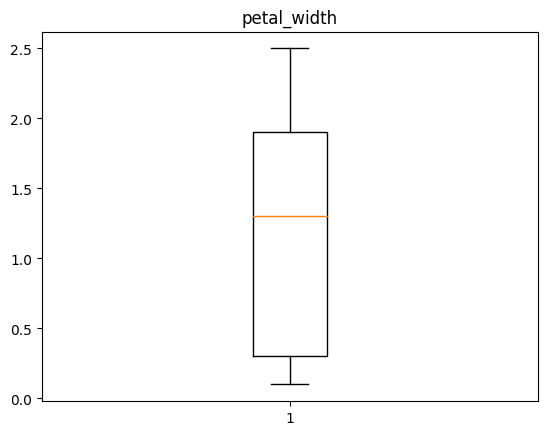

In [11]:
for col in num_col:
    plt.hist(train_iris[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train_iris[col])
    plt.title(col)
    plt.show()

b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [12]:
train_iris.species.value_counts()

species
versicolor    35
setosa        35
virginica     35
Name: count, dtype: int64

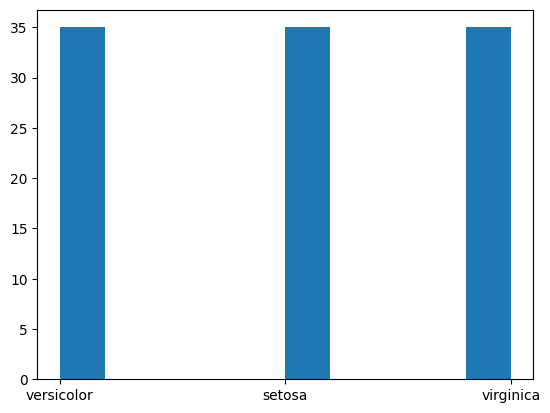

In [13]:
plt.hist(train_iris.species)
plt.show()

c. Document takeaways & any actions.

- There is an equal number of species in the train dataset.




3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

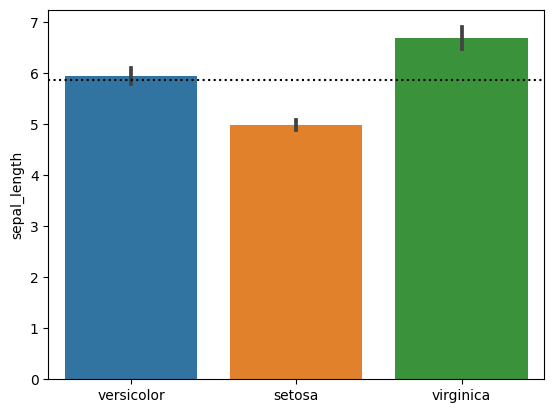

In [14]:
sns.barplot(data = train_iris, x = 'species', y = 'sepal_length')
mean_sepal__length = train_iris.sepal_length.mean()
plt.axhline(y = train_iris['sepal_length'].mean(), color = 'black', linestyle = 'dotted')
plt.xlabel('')
plt.show()

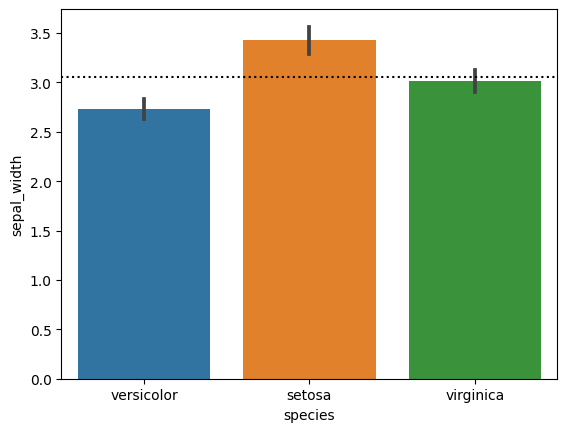

In [15]:
sns.barplot(data=train_iris, x='species', y='sepal_width')
plt.axhline(y=train_iris["sepal_width"].mean(), color="black", linestyle="dotted")

plt.show()

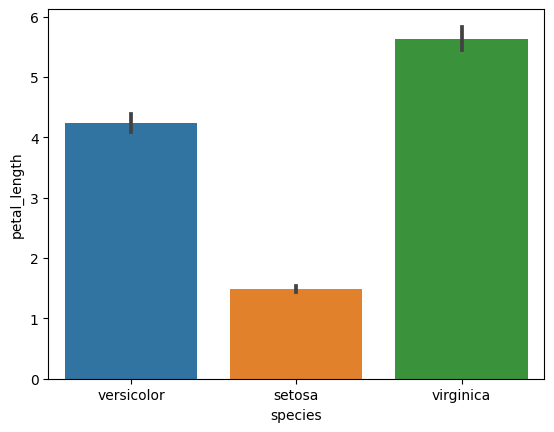

In [16]:
sns.barplot(data=train_iris, x='species', y='petal_length')
plt.axhline(y=train_iris["petal_length"].mean(), color="black", linestyle="")
plt.show()

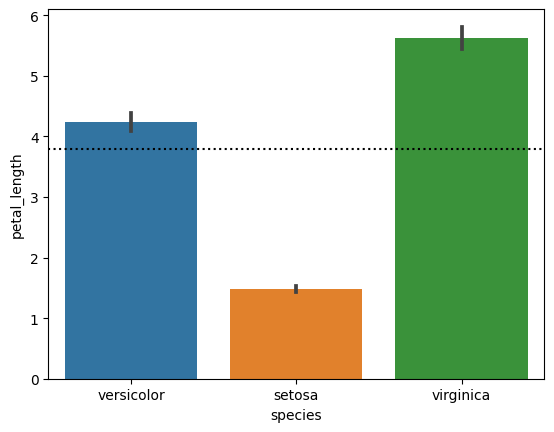

In [17]:
sns.barplot(data=train_iris, x='species', y='petal_length')
plt.axhline(y=train_iris["petal_length"].mean(), color="black", linestyle="dotted")
plt.show()

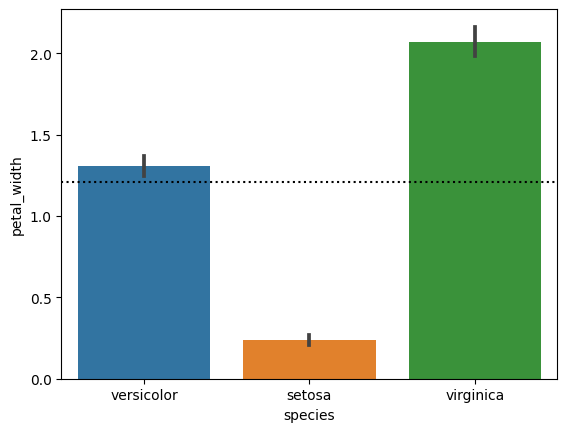

In [18]:
sns.barplot(data=train_iris, x='species', y='petal_width')
plt.axhline(y=train_iris["petal_width"].mean(), color="black", linestyle="dotted")
plt.show()

b. For each measurement type, compute the descriptive statistics for each species.



In [19]:
setosa_train = train_iris[train_iris.species == 'setosa']


In [20]:
print(f'Setosa Sepal Length: {round(setosa_train.sepal_length.mean(),2)}')


Setosa Sepal Length: 4.99


In [21]:
setosa_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,4.988571,3.425714,1.485714,0.240000
std,0.326092,0.423114,0.153667,0.097619
min,4.300000,2.300000,1.100000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.150000,3.700000,1.550000,0.300000
max,5.700000,4.400000,1.900000,0.400000


In [22]:
virginica_train = train_iris[train_iris.species == 'virginica']

In [23]:
virginica_train.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,6.682857,3.008571,5.631429,2.068571
std,0.661320,0.347573,0.576384,0.256414
min,5.600000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.900000
50%,6.700000,3.000000,5.600000,2.100000
75%,7.200000,3.200000,6.000000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [24]:
versicolor_train = train_iris[train_iris.species == 'versicolor']

In [25]:
versicolor_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,5.948571,2.731429,4.237143,1.308571
std,0.497861,0.296818,0.466581,0.191544
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.550000,4.000000,1.200000
50%,5.900000,2.800000,4.200000,1.300000
75%,6.250000,2.950000,4.600000,1.450000
max,7.000000,3.200000,5.100000,1.800000


c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



- Null Hypothesis: population means of the petal width for all three species are equal.
- Alternative Hypothesis: population means of the petal width for all three species are not equal.
                                                      
                                                    

In [33]:
virginica_pw = virginica_train.petal_width
virginica_pw

143    2.3
145    2.3
102    2.1
110    2.0
125    1.8
144    2.5
123    1.8
105    2.1
122    2.0
146    1.9
131    2.0
128    2.1
119    1.5
100    2.5
135    2.3
113    2.0
137    1.8
103    1.8
109    2.5
136    2.4
121    2.0
120    2.3
118    2.3
115    2.3
149    1.8
117    2.2
112    2.1
126    1.8
129    1.6
114    2.4
142    1.9
124    2.1
130    1.9
139    2.1
101    1.9
Name: petal_width, dtype: float64

<Axes: >

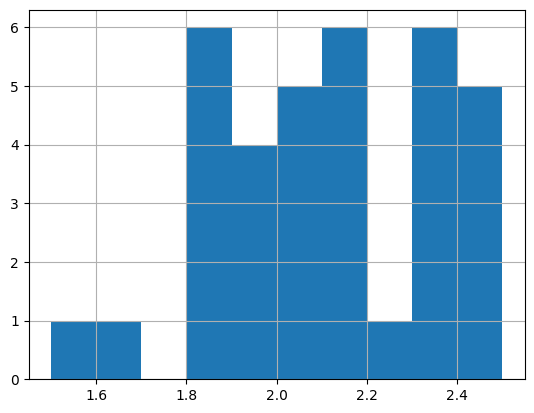

In [29]:
virginica_train.petal_width.hist()

In [34]:
versicolor_pw = versicolor_train.petal_width
versicolor_pw

98    1.1
68    1.5
99    1.3
78    1.5
80    1.1
70    1.8
95    1.2
52    1.5
89    1.3
67    1.0
64    1.3
65    1.4
62    1.0
71    1.3
82    1.2
81    1.0
91    1.4
96    1.3
86    1.5
76    1.4
59    1.4
83    1.6
74    1.3
54    1.5
88    1.3
87    1.3
60    1.0
73    1.2
90    1.2
50    1.4
72    1.5
61    1.5
92    1.2
79    1.0
94    1.3
Name: petal_width, dtype: float64

<Axes: >

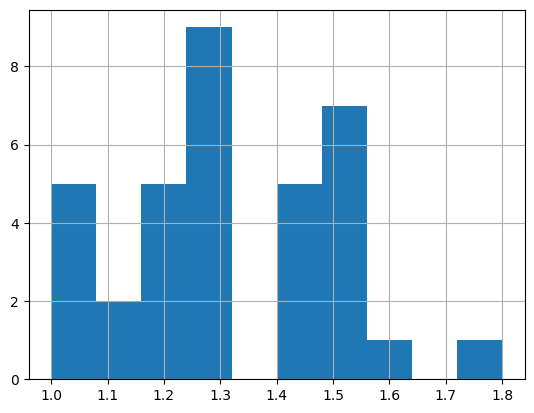

In [32]:
versicolor_train.petal_width.hist()

In [37]:
setosa_pw = setosa_train.petal_width
setosa_pw

19    0.3
9     0.1
46    0.2
8     0.2
1     0.2
25    0.2
26    0.4
29    0.2
31    0.4
6     0.3
21    0.4
16    0.4
15    0.4
17    0.3
12    0.1
45    0.3
0     0.2
47    0.2
36    0.2
24    0.2
41    0.3
39    0.2
4     0.2
34    0.2
32    0.1
30    0.2
44    0.4
13    0.1
5     0.4
48    0.2
27    0.2
11    0.2
37    0.1
33    0.2
3     0.2
Name: petal_width, dtype: float64

<Axes: >

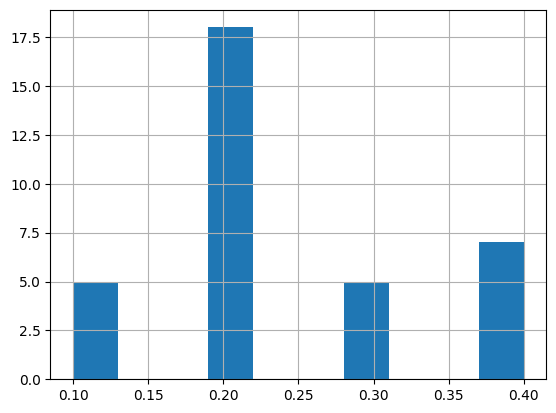

In [38]:
setosa_train.petal_width.hist()

In [42]:
a = 0.05

In [43]:
t, p = stats.f_oneway(virginica_pw, versicolor_pw, setosa_pw)
t,p

(791.3497448213755, 7.690668654365097e-63)

In [44]:
if p < a:
    print ('We reject Null')
else:
    print(' We fail to reject')

We reject Null
